<a href="https://colab.research.google.com/github/sadhanc0419/hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
from google.colab import files


uploaded = files.upload()



Saving Hotel Bookings.csv to Hotel Bookings.csv


1. Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Hotel Bookings.csv']))
df.head(5)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

** Checking shape**

In [6]:
df.shape

(119390, 32)

**Check each data type of columns and missing values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**5. Check the missing values**

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#column wise null oercentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Dropping columns with high missing values and filling other null values.
94% values of company columns are missing so we can drop it.

In [11]:
df = df.drop(['company'], axis = 1)

In [12]:
df['agent'].fillna('No Agent', inplace= True)
df['country'].fillna('No Country', inplace= True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Exploratory Data Analysis**



# 1. Monthly booking Analysis

In [14]:
import plotly.express as px
year = df["arrival_date_month"].value_counts()
# pie plot
fig = px.pie(year,values = year.values,names = year.index,title="Bookings per year",template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

# 2. Customers arrive in both the hotels year-wise

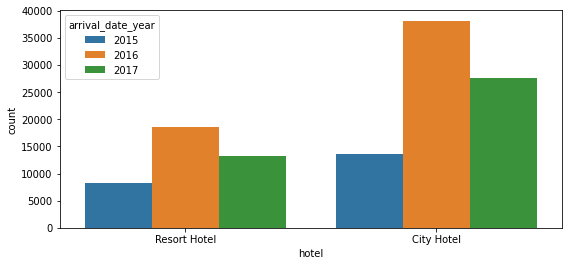

In [15]:
plt.figure(figsize=(9,4))
sns.countplot(x='hotel',hue='arrival_date_year',data=df)

Here we can see that more customers have booked hotel in the year 2016, followed by 2017 and then 2015.

# 3. Deposit wise analysis


In [29]:
deposit = df["deposit_type"].value_counts()
# pie plot
fig = px.pie(deposit,values = deposit.values,names = deposit.index,title="Deposit Type",template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

# 4. Which hotel have the more number of bookings?

In [30]:
df2 = df.groupby(['hotel'])['hotel'].count()
df2.head()

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [31]:
# total bookings per market hotel (incl. canceled)
import plotly.express as px
months = df["hotel"].value_counts()
# pie plot
fig = px.pie(months,values = months.values,names = months.index,title="Bookings per hotel",template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

People have booked City hotel more than Resort hotel

From this we can say that City hotel has large number of bookings.

# 5. Where do the guests come from?

In [33]:
country_df = df.groupby(["country"])["country"].count().reset_index(name="count")
country_sorted =country_df.sort_values( by="count", ascending=False)
country_sorted

,country,count
136,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287
...,...,...
144,SDN,1
120,NCL,1
122,NIC,1
125,NPL,1


Ahh! so we can see that people are booking hotels from nearly 177 different countries.(one row has the count of all missing values)

# 6. Let's check the country with highest customer booking

In [34]:
country_sorted

,country,count
136,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287
...,...,...
144,SDN,1
120,NCL,1
122,NIC,1
125,NPL,1


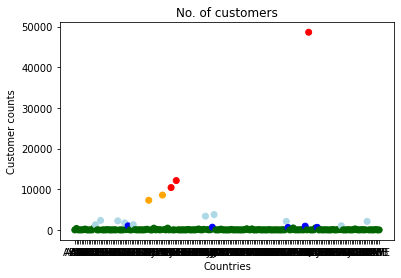

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math

#adding colors
cls=[]

for ind,rows in country_df.iterrows():
    if rows['count'] > 10000:
      cls.append('red')

        
    elif rows['count'] > 5000 :
      cls.append('orange')
    elif rows['count'] > 1000 :
      cls.append('lightblue')
    elif rows['count'] > 500:
      cls.append('blue')
      
    else:
        cls.append('darkgreen')
        
# plotting scatterplot      
fig = plt.figure()
#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
#ax.set_yticks([0, 500, 1000, 5000, 10000, 50000])

plt.scatter(country_df['country'],
            country_df['count'],
            c=cls)

plt.title("No. of customers")
plt.xlabel("Countries")
plt.ylabel("Customer counts")
plt.show()

# 7.Bookings by market segment

In [38]:
market = df["market_segment"].value_counts()
# pie plot
fig = px.pie(market,values = market.values,names = market.index,title="Bookings by market segment",template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

People are preferring travel agencies both online and offline for booking hotels.

# 8. How many bookings were cancelled?

In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

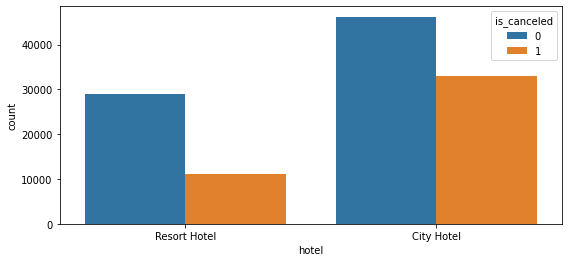

In [40]:
plt.figure(figsize=(9,4))
sns.countplot(x='hotel',hue='is_canceled',data=df)


1 means booking cancelled. Now let's see the percentage of overall cancelations.

In [41]:
canceled = df["is_canceled"].value_counts()
# pie plot
fig = px.pie(canceled,values = canceled.values,names = canceled.index,title="Percentage of bookings canceled",template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

37% of overall bookings were cancelled

In [ ]:
df.columns